**Multi Class Weather Classification**

The aim of this project is to build a Convolution neural network that classifies different weather conditions from single images.

Importing packages

In [ ]:
import numpy as np
import pandas as pd
import random
import os
from tensorflow.keras.models import Sequential
import cv2
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from google.colab import drive
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Data Preprocessing for our model.


*   The weather dataset is saved in local drive in respective folder labelled by identifying weather condition in the image such as cloudy,foggy,Rainy,sunrise,shine

* The goal is to predict the likelihood that the  weather condition is from  a certain class from the provided classes,thus making it a multi-class classification problem.
* Five target classes are provided in this dataset: Cloudy, Rainy,Sunrise, Shine, Foggy




In [ ]:
import tqdm as tqdm
x = []
y = [] 
dataset =[]
directory='/content/drive/My Drive//weather_data/dataset'
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y

# root directories for the 5 classes
foggy = "/content/drive/My Drive//weather_data/dataset/foggy"
sunrise = "/content/drive/My Drive//weather_data/dataset/sunrise"
shine = "/content/drive/My Drive//weather_data/dataset/shine"
rainy = "/content/drive/My Drive//weather_data/dataset/rainy"
cloudy = "/content/drive/My Drive//weather_data/dataset/cloudy"
test = "/content/drive/My Drive//weather_data/dataset/alien_test"

x,y= create_dataset(foggy,"foggy")
x,y= create_dataset(sunrise,"sunrise")
x,y= create_dataset(shine,"shine")
x,y= create_dataset(rainy,"rainy")
x,y= create_dataset(cloudy,"cloudy")
x =  np.array(x)
y = np.array(y)

100%|██████████| 300/300 [01:18<00:00,  3.83it/s]


In [ ]:
x.shape,y.shape

((1498, 150, 150, 3), (1498,))

The data consists of 1498 images and each image's width and height resized to 150 

Distribution of images

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


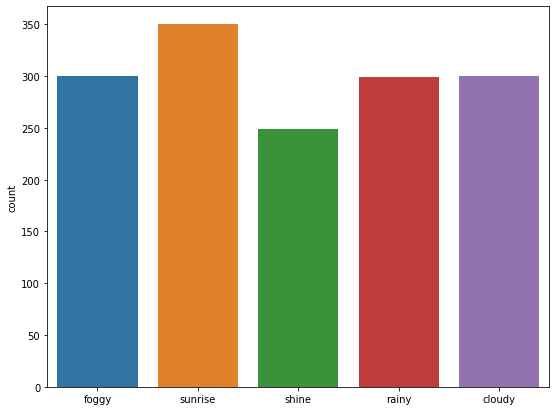

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,7))
sns.countplot(y)
plt.show()

we can see imbalanced data sunrise has most number of images

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
img_size =150

x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0


x_train = x_train.reshape(-1,img_size,img_size,3)
y_train = np.array(y_train)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)

Model Building Loading the pretrained version of neural network VGG19



In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
model=Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(5,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 40965     
Total params: 20,065,349
Trainable params: 40,965
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train_lb,epochs=15,batch_size=32,verbose=1)

Epoch 1/15
33/33 [==============================] - 272s 8s/step - loss: 0.9979 - accuracy: 0.6326
Epoch 2/15
33/33 [==============================] - 270s 8s/step - loss: 0.4728 - accuracy: 0.8578
Epoch 3/15
33/33 [==============================] - 270s 8s/step - loss: 0.3290 - accuracy: 0.9198
Epoch 4/15
33/33 [==============================] - 269s 8s/step - loss: 0.2594 - accuracy: 0.9494
Epoch 5/15
33/33 [==============================] - 270s 8s/step - loss: 0.2208 - accuracy: 0.9494
Epoch 6/15
33/33 [==============================] - 270s 8s/step - loss: 0.1834 - accuracy: 0.9609
Epoch 7/15
33/33 [==============================] - 270s 8s/step - loss: 0.1599 - accuracy: 0.9704
Epoch 8/15
33/33 [==============================] - 269s 8s/step - loss: 0.1330 - accuracy: 0.9790
Epoch 9/15
33/33 [==============================] - 269s 8s/step - loss: 0.1158 - accuracy: 0.9828
Epoch 10/15
33/33 [==============================] - 269s 8s/step - loss: 0.1030 - accuracy: 0.9800
Epoch 11/

In [ ]:
score=model.evaluate(x_test,y_test_lb,verbose=0)
print('loss',score[0])
print('Accuracy score',score[1])

loss 0.3770678639411926
Accuracy score 0.8733333349227905


Accuracy of the model on the test data is 86%

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Model Evaluation using Accuracy and Confusion Matrix

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8733333333333333

Our model predicts 88% score

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[ 76  10   2   6   0]
 [  0  69   8   1   6]
 [  0   7  94   1   2]
 [  5   1   0  54   1]
 [  1   2   1   3 100]]


Plotting Confusion Matrix for the predicted values

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

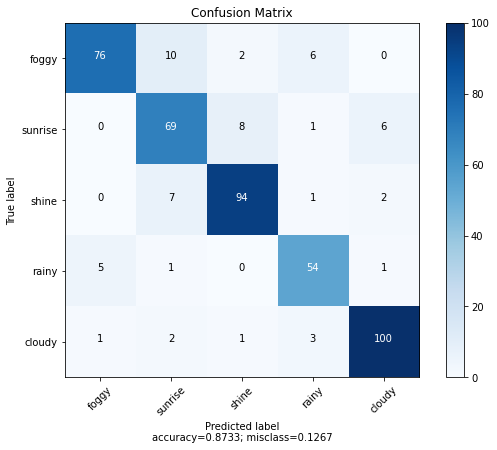

In [ ]:
plot_confusion_matrix(cm=confusion, target_names = ['foggy', 'sunrise','shine','rainy','cloudy'], title = 'Confusion Matrix',normalize=False)



Model Performance

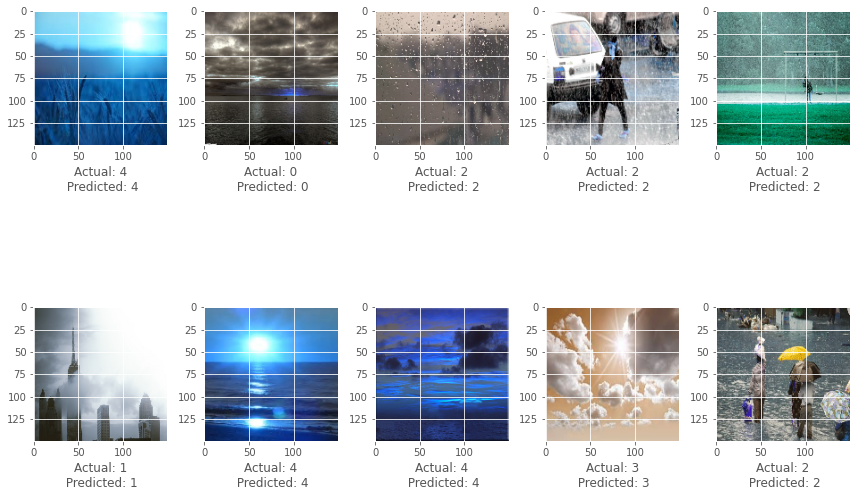

In [ ]:
#target_labels={0 :'foggy',1:'sunrise',2:'shine',3:'rainy',4:'cloudy'}
plt.figure(figsize=(12,9))
plt.style.use("ggplot")
for i in range(10):
    sample = random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(x_test[sample])
    plt.xlabel(f"Actual: {y_test[sample]}\n Predicted: {y_pred[sample]}")
    
plt.tight_layout()    
plt.show() 

To increase the accuracy of the model on unseen data we need more training data 

Our approach learned multi-feature dictionaries on each feature to improve the discriminationof image representation and enhance the performance of multipleweather classiﬁcation.Our work can be applied for the detection and observation of weather conditions,image/video analysis, the reliability improvement of video sur-veillance systems, and so on